In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('./train.csv')

In [5]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 探索数据
# object 表示不是数字
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# 筛选特征
# carbin缺失值太严重，删除. 以及其他与存活无关，删除
# axis= 1 表示对列操作。0表示对行
data.drop(['Cabin','Name','Ticket'], inplace = True, axis= 1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [8]:
# 处理缺失值[可以使用算法填充]
data['Age'] = data['Age'].fillna(data['Age'].mean())
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [9]:
#data.info()

In [10]:
# Embarked 有两个数据是空的，比较少，所以可以直接删除。但是缺失值多的，比如age就不可以直接删除
# axis = 0 表示行，默认也是删除行
data = data.dropna(axis=0)
# data.info() # 无缺失值

In [11]:
# 字符串处理

# 思考：分类型变量无顺序且类别少，可以这样转换【即直接转换为数字】，有顺序就不可以
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x : labels.index(x))

<ipython-input-11-47ce1bc533bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = data['Embarked'].apply(lambda x : labels.index(x))


In [12]:
# Sex 也可以采用上面的方式转化， 这里介绍一种新的方式
data['Sex'] = (data['Sex'] == 'male').astype("int")

# data.loc(:, "Sex") = (data['Sex'] == 'male').astype("int")
# data.iloc(:, 3) = (data['Sex'] == 'male').astype("int")

<ipython-input-12-44b21151f2b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = (data['Sex'] == 'male').astype("int")


In [13]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [14]:
x = data.iloc[:, data.columns != 'Survived']

In [16]:
y = data.iloc[:, data.columns == 'Survived']

In [17]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3)

Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
146,147,3,1,27.000000,0,0,7.7958,0
134,135,2,1,25.000000,0,0,13.0000,0
668,669,3,1,43.000000,0,0,8.0500,0
748,749,1,1,19.000000,1,0,53.1000,0
836,837,3,1,21.000000,0,0,8.6625,0
...,...,...,...,...,...,...,...,...
330,331,3,0,29.699118,2,0,23.2500,2
430,431,1,1,28.000000,0,0,26.5500,0
695,696,2,1,52.000000,0,0,13.5000,0
116,117,3,1,70.500000,0,0,7.7500,2


In [20]:
# 取出来后，索引混乱，如无必须，建议修改成顺序的
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

Xtrain                    

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,147,3,1,27.000000,0,0,7.7958,0
1,135,2,1,25.000000,0,0,13.0000,0
2,669,3,1,43.000000,0,0,8.0500,0
3,749,1,1,19.000000,1,0,53.1000,0
4,837,3,1,21.000000,0,0,8.6625,0
...,...,...,...,...,...,...,...,...
617,331,3,0,29.699118,2,0,23.2500,2
618,431,1,1,28.000000,0,0,26.5500,0
619,696,2,1,52.000000,0,0,13.5000,0
620,117,3,1,70.500000,0,0,7.7500,2


In [21]:
clf = DecisionTreeClassifier(random_state=0)

clf =  clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

score

0.7378277153558053

In [ ]:
# 使用交叉验证看一下
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
score = cross_val_score(clf, x, y, cv = 10).mean()
score

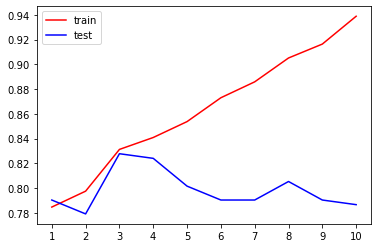

In [27]:
# 绘制学习曲线 -- 用来确定某个参数，到底哪个值是好的
test_tr = []
test_te = []

for i in range(10):
    clf = DecisionTreeClassifier(random_state = 30
#                                   ,splitter = 'random'
                                  ,max_depth = i + 1  # 这个主要是用来调节最大深度的，所以用i
#                                   ,min_samples_leaf=4
#                                   ,min_samples_split=2
                                criterion='entropy'
                                     )
        
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = clf.score(Xtest, Ytest)
    test_tr.append(score_tr)
    test_te.append(score_te)

plt.plot(range(1, 11), test_tr, color = 'red', label = 'train')
plt.plot(range(1, 11), test_te, color = 'blue', label = 'test')
                                      
plt.xticks(range(1, 11))
plt.legend()
plt.show()

In [ ]:
# 随着训练深度的加大，训练集严重过拟合
# 在深度为3 的时候，模型过拟合稍稍轻微，之后测试集上的准确度组件下降
# 增加criterion='entropy' 参数，看看效果，发现在3的时候，训练集和测试集准确率更接近  
# - 一般criterion='entropy'是在模型欠拟合的时候考虑的，过拟合不需要使用，但是现在深度为3的时候，模型是轻微过拟合的，所以可以加上看看效果

In [32]:
import numpy as np
# 网格搜索 -- 能够帮助我们同时调整多个参数的技术，是一种枚举技术
# GridSearchCV 同时满足了训练、分数和交叉验证
clf = DecisionTreeClassifier(random_state=30)

# parameters 本质是一串参数，和这些参数对应的，我们希望网格搜索来搜索的参数的去取值范围

gini_threshold = np.linspace(0,0.5,50) # 0到0.5之间，有顺序的50个数字[基尼指数的范围是0-0.5，所以这样取值]
# entropy_threshold = np.linspace(0,1,50)
# 一般情况下，我们只选择一两个组合参数来多次搜索，而不是直接把这么多的参数放进去，让暴力搜索
parameters = {
    "criterion" :("gini", "entropy")
    ,"splitter": ("best", "random")
    ,"max_depth" :[*range(1, 10)] # 上面已经得出3，这里纯为测试
    ,"min_samples_leaf" :[*range(1,50,5)]
    ,"min_impurity_decrease" : [*np.linspace(0,0.5,50)] # 信息增益的最小值，一般在不使用网格搜索的情况下，是很不好使用的
    
}
gs = GridSearchCV(clf, parameters, cv = 10)
gs = gs.fit(Xtrain, Ytrain)

In [33]:
# 从我们输入的参数和参数值取值列表，返回最佳组合
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [34]:
# 网格搜索后的模型的评判标准
gs.best_score_

0.8118023553507424

In [ ]:
# 网格搜索的缺点：如果输出的调节的参数很多，那么他只会选择所有参数的最佳组合，这样可能导致网格搜索后，准确率反而下降
# 需要思考及调研的点：网格搜索有什么调节方式，怎么调节可以优化模型